In [90]:
#проверить, все ли библиотеки нужны 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/Users/anastasiafedoracenko/Desktop/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df['age'].describe()

#тут мы исследовали возраст всех "опрашиваемых", видим, что возраст варьируется от 17 до 90

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [4]:
df.info()

#видим, что пропусков в данных нет, но есть некорректыне данные, выявим все колонки и выкинем из выборки 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
print('................................')
print('age')
print(df['age'].unique())
print('................................')
print('workclass')
print(df['workclass'].unique())
print('................................')
print('marital-status')
print(df['marital-status'].unique())
print('................................')
print('education')
print(df['education'].unique())
print('................................')
print('educational-num ')
print(df['educational-num'].unique())
print('................................')
print('occupation')
print(df['occupation'].unique())
print('................................')
print('relationship')
print(df['relationship'].unique())
print('................................')
print('race')
print(df['race'].unique())
print('................................')
print('gender')
print(df['gender'].unique())
print('................................')
print('capital-gain ')
print(df['capital-gain'].unique())
print('................................')
print('capital-loss  ')
print(df['capital-loss'].unique())
print('................................')
print('hours-per-week')
print(df['hours-per-week'].unique())
print('................................')
print('native-country')
print(df['native-country'].unique())
print('................................')
print('income')
print(df['income'].unique())



# Итак, информации много, но тем не менее видим, что нежелательные данные, т.е. "?", есть в столбцах
# workclass, occupation и native-country. Можно провести небольшую аналитику, что б выяснить характеристику опрошенных 
# в данных категориях, выяснить важна ли нам эта категория и подставить туда значения ( по моде или опираясь на 
# схожие харктеристики), или удалить полностью столбец за ненадобностью. 


# Заранее выскажу свое личное мненение, я бы провела анализ, выявила бы статистику или закономерности 
# того или иного дохода в зависимости от предполагаемых данных на пустых значениях в столбцax workclass и occupation 
# и подставила бы.  
# Потому что доход зависит от места работы и класса, а вот родная страна, скорее нет. Потому что родная страна не означает 
# страну где тот самый доход реализован, так что критейрий отосительный по важности, я считаю. 

................................
age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
................................
workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
................................
marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
................................
education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
................................
educational-num 
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
................................
occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-s

In [6]:
#Для начала хочу выяснить, кто те, у кого прощуны данные о месте работы
# Для этого заменим ? на NaN и посмотрим новую статистику по данным 

 
df.loc[df['workclass'] == '?', 'workclass'] = np.nan 
df.loc[df['occupation'] == '?', 'occupation'] = np.nan 
df.loc[df['native-country'] == '?', 'native-country'] = np.nan 

df.isna().sum()

#количество пропусков

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
print(df['workclass'].value_counts())
print('\t')
print(df['occupation'].value_counts())
print('\t')
print(df['native-country'].value_counts())

#чаще всего вид занятости: частный; по профессии сложно сказать однозначно, чаще всего встречается 5 категорий; 
#а родная страна чаще является Штатами. 

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
	
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
	
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
Chi

In [8]:
#Пропуски по виду деятельности можно по умолчанию заменить на частный(по моде)
#Пропуски по роднуй стране можно заменить на штаты(по моде)
#Проспуски по профессии проще удалить, что б сильно не косить статистику, но как вариант можно было бы
#рандомом выставить 1 из 5


In [9]:
df = df[~(df['workclass'].isna())]
df = df[~(df['occupation'].isna())]
df = df[~(df['native-country'].isna())]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


<AxesSubplot:title={'center':'Кол-во людей с доходом ниже 50к и выше'}>

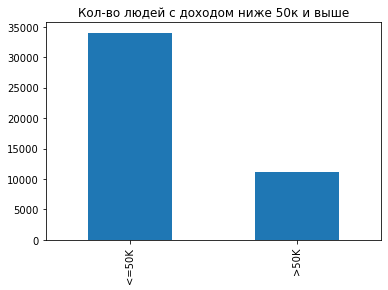

In [10]:
df['income'].value_counts().plot(kind = 'bar', title = 'Кол-во людей с доходом ниже 50к и выше')

#разница в кол-ве опрошенных с разным уровнем заробатка 

<AxesSubplot:title={'center':'Возраст людей с доходом больше 50к'}, ylabel='Frequency'>

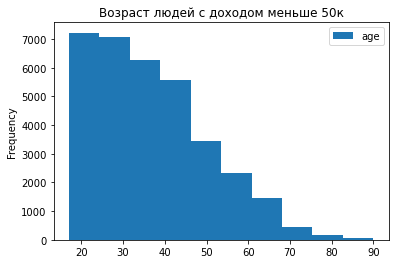

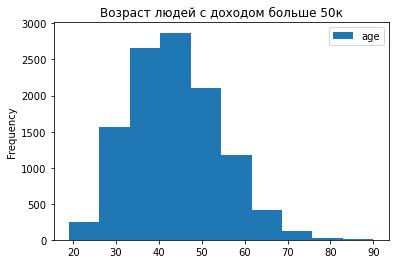

In [72]:
df1 = df[['age', 'income']].query("income in ['<=50K']")
df2 = df[['age', 'income']].query("income in ['>50K']")

df1.plot(kind = 'hist', title = 'Возраст людей с доходом меньше 50к')
df2.plot(kind = 'hist', title = 'Возраст людей с доходом больше 50к' )

# Отчетливо видно, что более молодые люди зарабатывают меньше, более 50к люди зарабатывают в возрасте от ~30 до ~60 


In [11]:
df[['gender', 'income']].value_counts()

#тут не будем строить визуализацию, но видно, что кол-во женчин с высоким уровнем дохода в разы меньше 

gender  income
Male    <=50K     20988
Female  <=50K     13026
Male    >50K       9539
Female  >50K       1669
dtype: int64

In [12]:
df[['relationship', 'income']].value_counts()

#очень интересное наблюдение, но кол-во людей или не состоящих в семье, или не замужних, или имеющих детей,
#практически в 90% случаях зарабатывают меньше 50к

#это косвенный и очень субъктивный вывод, но получается, что наличие детей забирает какое-то кол-во ресурса,
#которое могло бы повлиять на рост в карьере
#субъуктивный вывод 2 - отсутствие родных или супруга(и), по-моему мнению, влиятет на доход из-за
#меньшего кол-ва поддержки и веры со стороны(повторюсь, вывод субъективен), соответственно меньше успеха в карьере 

relationship    income
Not-in-family   <=50K     10474
Husband         <=50K     10159
                >50K       8507
Own-child       <=50K      6521
Unmarried       <=50K      4486
Other-relative  <=50K      1299
Not-in-family   >50K       1228
Wife            <=50K      1075
                >50K       1016
Unmarried       >50K        302
Own-child       >50K        105
Other-relative  >50K         50
dtype: int64

<AxesSubplot:title={'center':'Годы обучения людей с доходом больше 50к'}, ylabel='Frequency'>

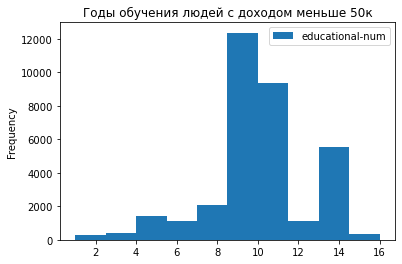

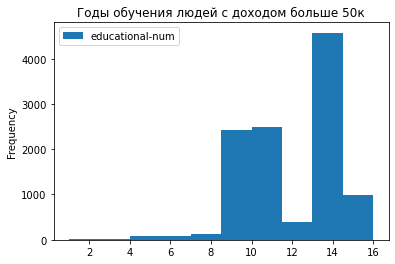

In [76]:
d1 = df[['educational-num', 'income']].query("income in ['<=50K']")
d2 = df[['educational-num', 'income']].query("income in ['>50K']")


d1.plot(kind = 'hist', title = 'Годы обучения людей с доходом меньше 50к')
d2.plot(kind = 'hist', title = 'Годы обучения людей с доходом больше 50к' )


# Видно, что люди с большим кол-вом лет образования больше зарабатывают, соответственно можно сделать вывод, что
#чем дольше человек учится и проявляет упорство в учебе, тем на больше доход он может расчитывать в будущем

In [85]:
s_columns = df[['educational-num', 'gender', 'age', 'relationship', 'workclass']]

In [93]:
x = pd.get_dummies(s_columns, columns=['gender', 'relationship', 'workclass'])
x

#перевели категориальные значения в бинарные, столбец income оставили для целевой переменной 

,educational-num,age,gender_Female,gender_Male,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,7,25,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1,9,38,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,12,28,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,10,44,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
5,6,34,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
48838,9,40,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
48839,9,58,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
48840,9,22,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [94]:
le = LabelEncoder()
le.fit(df['income'])

LabelEncoder()

In [97]:
y = pd.Series(data = le.transform(df['income']))
y.head(7)

0    0
1    0
2    1
3    1
4    0
5    1
6    0
dtype: int64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#делим данные на тест и обучение 80/20

In [104]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [105]:
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [106]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [108]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [117]:
model.score(X_train, y_train) 

#точность предсказания на обучающей выборке с помощью Логистической регрессии 

0.8181717665920336

In [118]:
model.score(X_test,y_test)

#точность предсказания на тестовой выборке с помощью Логистической регрессии 

0.8212271973466003

In [119]:
clf.score(X_train, y_train) 

#точность предсказания на тестовой выборке с помощью опорных векторов 

0.8197749951626724

In [120]:
clf.score(X_test, y_test)

#точность предсказания на тестовой выборке с помощью опорных векторов 

0.8239911553344389

# Выводы 

- работа с данными 
1. С данными было интересно работать, потому что уровень дохода может напрямую  изменяться от любого фактора, так же как и коррелировать с любым фактором. Я предположила, что уровень дохода зависит от образования, семейного положения(то есть кол-ва поодержки от близких), от пола, безусловно(хотя очень жаль) и от рабочего класса. Точной зависимости дохода от рассы, часов работы, родной страны мною найдено не было. 
2. Дальше отделили важные(по-моему мнению) колонки, преобразовали категориальные данные в бинарные, сделано это для простоты обучения модели. Дале перевели целевую перемененую так же в бинарный вид. 
3. Разбили данные на обучение и на тест. Иннициализировали логистическую регрессию и модель опорнх векторов. 
4. Обучили две модели, получили предсказания, оценили их качество. 

- предсказание
1. Предсказания получились довольно точными, хотя я бы хотела наверно получить от 85% и выше. В след раз буду докапываться к зависимостям больше. Хочется лучшего результата, что б было понимание всего проесса в полной мере. 

- работа моделей
1. Модели справились, учитывая колличество строк данных, в целом хорошо. 
2. Хочется понять зависимость дохода опрошенных от остальных факторов, до факткров потери и прироста капиталов не добралась нормально, не нашла взаимосвязи. Так же как и с столбцом fnlwgt - вообще странная вещь. Продолжительность чего и как она измеряется, в какую меру переводить для большего понимания - не понятно)) 

Классная домашка! 

